## Temporal Analysis

This notebook will lay the framework for a temporal analysis of the research, teaching and jobs vectors of different institutions and cities. We will start with loading these vectors up.

In [1]:
import csv
import json
import operator

In [2]:
import numpy as np

In [3]:
def read_vectors(file_name):
    line = open(file_name, "r")
    for l in line:
        d = eval(l)
    final_dict = {eval(k):eval(v) for k, v in d.items()}
    return final_dict

In [4]:
# job_cities_vectors = read_vectors("../saved_data_structures/job_yearwise_vectors/jobs_vectors_cities_yearwise.txt")

In [5]:
# job_orgs_vectors = read_vectors("../saved_data_structures/job_yearwise_vectors/jobs_vectors_orgs_yearwise.txt")

In [6]:
research_cities_vectors = read_vectors("../saved_data_structures/research_teaching_yearwise_vectors/research_vectors_cities_yearwise.txt")

In [7]:
research_orgs_vectors = read_vectors("../saved_data_structures/research_teaching_yearwise_vectors/research_vectors_orgs_yearwise.txt")

In [8]:
# teaching_cities_vectors = read_vectors("../saved_data_structures/research_teaching_yearwise_vectors/teaching_vectors_cities_yearwise.txt")

In [9]:
teaching_orgs_vectors = read_vectors("../saved_data_structures/research_teaching_yearwise_vectors/teaching_vectors_orgs_yearwise.txt")

In [10]:
with open("../saved_data_structures/teaching_to_research_matching.txt") as file:
    teaching_to_research = json.load(file)

In [11]:
teaching_to_research_match = {}

In [12]:
for teach_org in teaching_to_research:
    if teaching_to_research[teach_org][1] > 90:
        teaching_to_research_match[teach_org] = teaching_to_research[teach_org][0]

In [13]:
teaching_to_research_match['University of California-Berkeley'] = 'Univ Calif Berkeley'
teaching_to_research_match['University of Washington-Seattle Campus'] = 'Univ Washington'
teaching_to_research_match['Georgia Institute of Technology-Main Campus'] = 'Georgia Tech'
teaching_to_research_match['University of Pittsburgh-Pittsburgh Campus'] = 'Univ Pittsburgh'
teaching_to_research_match['Ohio State University-Main Campus'] = 'Ohio State Univ'
teaching_to_research_match['Texas A & M University-College Station'] = 'Texas A&M Univ'


In [103]:
teaching_to_research_match['Massachusetts Institute of Technology'] = 'MIT'

In [ ]:
teaching_to_research_match['']

In [14]:
entity_names = []
for pair in teaching_orgs_vectors:
    entity, year = pair
    if entity not in entity_names:
        entity_names.append(entity)

In [15]:
def unit_vector(vector):
    """ Returns the unit vector of the vector.  """
    return vector / np.linalg.norm(vector)

In [16]:
def angle_between(v1, v2):
    """ Returns the angle in radians between vectors 'v1' and 'v2'::

            >>> angle_between((1, 0, 0), (0, 1, 0))
            1.5707963267948966
            >>> angle_between((1, 0, 0), (1, 0, 0))
            0.0
            >>> angle_between((1, 0, 0), (-1, 0, 0))
            3.141592653589793
    """
    if v1 is None or v2 is None:
        return (None, None)
    v1_u = unit_vector(v1)
    v2_u = unit_vector(v2)
    cos = np.clip(np.dot(v1_u, v2_u), -1.0, 1.0)
    return np.arccos(cos)*57.2958 , cos

In [17]:
def find_similar(name, dictionary, n=5, reverse=False, cutoff=100):
    angles = {}
    for entity in dictionary:
        if entity != name and dictionary[entity][2] > cutoff:
            angles[entity] = round(angle_between(dictionary[entity][0], dictionary[name][0])[0], 3)
    
    sorted_n = sorted(angles.items(), key=operator.itemgetter(1))
    if not reverse:
        return(sorted_n[0:n])
    if reverse:
        sorted_n.reverse()
        return(sorted_n[0:n])

In [18]:
for year in range(2006, 2015):
    avg_mean = np.array(np.array(research_orgs_vectors[('Georgia Tech', year)][0]) + np.array(research_orgs_vectors[('Georgia Inst Technol', year)][0])) / 2.0
    avg_var = np.array(np.array(research_orgs_vectors[('Georgia Tech', year)][1]) + np.array(research_orgs_vectors[('Georgia Inst Technol', year)][1])) / 2.0
    total_papers = research_orgs_vectors[('Georgia Tech', year)][2] + research_orgs_vectors[('Georgia Inst Technol', year)][2]
    research_orgs_vectors[('Georgia Tech', year)] = (avg_mean, avg_var, total_papers)

In [19]:
find_similar(('University of Chicago', 2008), teaching_orgs_vectors, n=15)

[(('Washington University in St Louis', 2012), 24.678),
 (('University of Chicago', 2016), 25.475),
 (('University of Oregon', 2011), 25.705),
 (('University of California-Berkeley', 2016), 25.986),
 (('Washington University in St Louis', 2013), 26.224),
 (('University of Oregon', 2012), 26.301),
 (('University of Oregon', 2013), 27.276),
 (('Bennington College', 2010), 27.462),
 (('University of California-San Diego', 2014), 27.884),
 (('California State University-Chico', 2014), 27.987),
 (('Portland State University', 2011), 28.233),
 (('University of California-San Diego', 2012), 28.386),
 (('University of California-San Diego', 2009), 28.387),
 (('Stanford University', 2015), 28.65),
 (('Rhodes College', 2011), 28.757)]

In [20]:
find_similar(('Univ Chicago', 2008), research_orgs_vectors, n=15)

[(('Univ Chicago', 2009), 3.144),
 (('Univ Chicago', 2007), 3.31),
 (('Univ Chicago', 2006), 3.454),
 (('Univ Chicago', 2014), 3.994),
 (('Univ Chicago', 2011), 4.123),
 (('Univ Chicago', 2013), 4.154),
 (('Univ Chicago', 2010), 4.222),
 (('NYU', 2008), 4.273),
 (('Univ Virginia', 2011), 4.485),
 (('Univ Chicago', 2015), 4.545),
 (('Univ Texas', 2006), 4.583),
 (('Univ Chicago', 2012), 4.777),
 (('Yale Univ', 2007), 4.935),
 (('Univ Texas', 2007), 5.2),
 (('Univ Virginia', 2012), 5.478)]

In [21]:
find_similar(('MIT', 2008), research_orgs_vectors, n=15)

[(('MIT', 2010), 2.903),
 (('MIT', 2006), 2.943),
 (('MIT', 2007), 2.943),
 (('MIT', 2009), 3.029),
 (('Princeton Univ', 2012), 3.934),
 (('MIT', 2012), 4.011),
 (('Princeton Univ', 2008), 4.154),
 (('Princeton Univ', 2010), 4.337),
 (('Princeton Univ', 2013), 4.344),
 (('MIT', 2011), 4.365),
 (('Princeton Univ', 2009), 4.576),
 (('Carnegie Mellon Univ', 2010), 4.581),
 (('Univ Calif Berkeley', 2007), 4.887),
 (('Princeton Univ', 2006), 4.933),
 (('Carnegie Mellon Univ', 2009), 4.937)]

In [22]:
find_similar(('Georgia Tech', 2006), research_orgs_vectors, n=15)

[(('Univ Cent Florida', 2009), 9.393),
 (('Univ Cent Florida', 2007), 9.629),
 (('Univ Texas Dallas', 2009), 9.877),
 (('IIT', 2006), 9.9),
 (('Univ Texas Dallas', 2010), 10.05),
 (('IIT', 2012), 10.076),
 (('IBM Corp', 2014), 10.102),
 (('IIT', 2009), 10.259),
 (('Univ Cent Florida', 2008), 10.355),
 (('Univ Texas Dallas', 2012), 10.359),
 (('Univ Cent Florida', 2010), 10.52),
 (('IBM Corp', 2011), 10.545),
 (('Lehigh Univ', 2007), 10.634),
 (('Univ Texas Arlington', 2011), 10.638),
 (('Georgia Tech', 2014), 10.789)]

In [23]:
find_similar(('Georgia Tech', 2015), research_orgs_vectors, n=15)

[(('Univ Texas Austin', 2007), 13.53),
 (('Rochester Inst Technol', 2013), 14.122),
 (('Carnegie Mellon Univ', 2006), 14.423),
 (('Virginia Tech', 2007), 14.503),
 (('IBM Corp', 2007), 14.614),
 (('Virginia Tech', 2008), 14.781),
 (('George Mason Univ', 2006), 14.782),
 (('Lehigh Univ', 2011), 14.842),
 (('Syracuse Univ', 2009), 14.86),
 (('Stevens Inst Technol', 2012), 15.015),
 (('Univ Texas Dallas', 2007), 15.19),
 (('IBM Corp', 2008), 15.286),
 (('IIT', 2009), 15.286),
 (('Worcester Polytech Inst', 2008), 15.317),
 (('Univ Texas Dallas', 2009), 15.365)]

In [147]:
def vector_change(vector, min_papers=25):
    entity_names = []
    for pair in vector:
        entity, year = pair
        if entity not in entity_names:
            entity_names.append(entity)
    entity_vector_changes = {}
    for entity in entity_names:
        years = range(2006, 2018)
        exist = []
        for year in years:
            if (entity, year) in vector and vector[(entity, year)][2] > min_papers:
                exist.append(year)
        if len(exist) == 0:
            continue
        min_year = min(exist)
        max_year = max(exist)
        
        entity_vector_changes[entity] = round(angle_between(vector[(entity, min_year)][0], vector[(entity, max_year)][0])[0], 10)

    return entity_vector_changes

In [178]:
research_orgs_changes = vector_change(research_orgs_vectors, min_papers=50)

In [179]:
teaching_orgs_changes = vector_change(teaching_orgs_vectors, min_papers=50)

In [162]:
research_orgs_changes['Univ Calif Berkeley']

5.1563229589

In [163]:
research_orgs_changes['Georgia Tech']

10.7890133256

In [164]:
sorted_research_orgs_changes = sorted(research_orgs_changes.items(), key=operator.itemgetter(1))

In [165]:
sorted_teaching_orgs_changes = sorted(teaching_orgs_changes.items(), key=operator.itemgetter(1))

In [172]:
sorted_research_orgs_changes[0:30]

[('Oregon Hlth Sci Univ', 0.0),
 ('New Mexico State Univ', 0.0),
 ('Boston Coll', 0.0),
 ('Univ Texas Galveston', 0.0),
 ('Cincinnati Childrens Hosp', 8.538e-07),
 ('Univ Texas', 2.0536169471),
 ('Univ Pittsburgh', 4.1805319214),
 ('Univ Wisconsin', 4.6802231509),
 ('Univ Calif Los Angeles', 4.6977884044),
 ('Duke Univ', 4.7748040093),
 ('Univ Minnesota', 4.8655793068),
 ('Louisiana State Univ', 4.966145265),
 ('Univ Calif Berkeley', 5.1563229589),
 ('Case Western Reserve Univ', 5.1711289549),
 ('Tufts Univ', 5.1953386992),
 ('Boston Univ', 5.2147518758),
 ('Univ Texas MD Anderson Canc Ctr', 5.2543926931),
 ('USDA', 5.2775118965),
 ('Wake Forest Univ', 5.2991203578),
 ('NASA', 5.3092487395),
 ('Cornell Univ', 5.3170439867),
 ('Univ Connecticut', 5.3476826123),
 ('Texas A&M Univ', 5.3492936047),
 ('Univ Chicago', 5.3592153224),
 ('Tulane Univ', 5.4097866029),
 ('Univ Tennessee', 5.4515215021),
 ('Univ Michigan', 5.4621094678),
 ('Univ Calif Davis', 5.4785519023),
 ('ARS', 5.4833189131),

In [173]:
sorted_research_orgs_changes[-30:]

[('Univ Texas Med Branch', 9.8936576515),
 ('Univ Calif Santa Barbara', 9.9230305781),
 ('Univ Texas Dallas', 10.0416282241),
 ('Drexel Univ', 10.1074333695),
 ('Fred Hutchinson Canc Res Ctr', 10.1280406675),
 ('Mississippi State Univ', 10.1413955264),
 ('Univ Idaho', 10.2339565389),
 ('Univ Houston', 10.2798125343),
 ('Virginia Polytech Inst & State Univ', 10.2951230186),
 ('Thomas Jefferson Univ', 10.348879224),
 ('Univ Delaware', 10.4138550781),
 ('Rensselaer Polytech Inst', 10.4454949199),
 ('Univ Texas Arlington', 10.4822660141),
 ('Univ Wyoming', 10.5095935315),
 ('Univ Cent Florida', 10.5167820115),
 ('US FDA', 10.5558047647),
 ('Univ N Texas', 10.6703172034),
 ('Georgia Tech', 10.7890133256),
 ('US EPA', 10.9982535116),
 ('NHLBI', 11.1608412877),
 ('So Illinois Univ', 11.236663659),
 ('Univ Toledo', 11.2593284702),
 ('Univ Texas Austin', 11.4102325155),
 ('Ohio Univ', 11.8751655813),
 ('Beth Israel Deaconess Med Ctr', 12.0055523775),
 ('NIH', 12.4367803651),
 ('N Dakota State U

In [174]:
sorted_teaching_orgs_changes[0:30]

[('Valencia College', 0.0),
 ('Palm Beach State College', 0.0),
 ('Nova Southeastern University', 0.0),
 ('University of North Carolina at Chapel Hill', 0.0),
 ('Florence-Darlington Technical College', 0.0),
 ('Calvin College', 0.0),
 ('The University of Texas of the Permian Basin', 0.0),
 ('North Central Texas College', 0.0),
 ('Rio Salado College', 0.0),
 ('Santa Barbara City College', 0.0),
 ('North Central State College', 0.0),
 ('Minnesota State College-Southeast Technical', 0.0),
 ('Brandeis University', 8.538e-07),
 ('University of Rhode Island', 8.538e-07),
 ('College of Marin', 8.538e-07),
 ('Central Lakes College-Brainerd', 1.2074e-06),
 ('Central Michigan University', 1.2074e-06),
 ('SUNY at Binghamton', 1.2074e-06),
 ('Galveston College', 4.0744213576),
 ('Bellevue College', 5.0969404343),
 ('The University of Texas at Tyler', 5.1257592159),
 ('Dixie State University', 5.8188007707),
 ('Tyler Junior College', 5.8781476678),
 ('Southern Maine Community College', 6.1155218914

In [169]:
sorted_teaching_orgs_changes[-30:]

[('Lansing Community College', 16.9017629858),
 ('The University of Texas at Arlington', 18.0855248642),
 ('Park University', 18.301895948),
 ('South Texas College', 18.8048918002),
 ('Bainbridge State College', 19.8516932047),
 ('Carnegie Mellon University', 20.1429719046),
 ('Blinn College', 20.5606108849),
 ('Casper College', 20.782816091),
 ('Lamar State College-Port Arthur', 20.7915415699),
 ('North Idaho College', 21.464381859),
 ('University of Florida', 21.8885893037),
 ('University of California-Irvine', 22.1277922004),
 ('The University of Texas at Austin', 22.3304274655),
 ('McLennan Community College', 23.0066010582),
 ('The University of Texas at Dallas', 25.0715182887),
 ('Alvin Community College', 25.3260995289),
 ('Loyola University New Orleans', 26.378563899),
 ('The University of Montana', 26.425997267),
 ('Imperial Valley College', 27.032456339),
 ('Amarillo College', 27.564027358),
 ('The University of Alabama', 29.5787790049),
 ('American University', 30.9383510282

### Direction of Changes

In [35]:
from gensim.models.doc2vec import Doc2Vec

In [36]:
d2vmodel = Doc2Vec.load("../embedding_models/alldoc2vec")

In [37]:
AI_keywords = "Artificial Intelligence Machine Learning Data Oriented Methods Learning Process Classification \
                Prediction Performance Dataset Automation Automating Kernel Vector Computational"

In [38]:
AI_vector = d2vmodel.infer_vector(AI_keywords)

In [39]:
angle_between(AI_vector, research_orgs_vectors[("Georgia Tech", 2006)][0])[0]

69.59176790168699

In [40]:
angle_between(AI_vector, research_orgs_vectors[("Georgia Tech", 2015)][0])[0]

65.4062296942917

In [175]:
def maximum_change(vectors, direction_vector, min_papers=50, rev=False):
    angles_between = {}
    entity_names = []
    
    for pair in vectors:
        entity, year = pair
        if entity not in entity_names:
            entity_names.append(entity)
    
    for entity in entity_names:
        years = range(2006, 2018)
        exist = []
        for year in years:
            if (entity, year) in vectors and vectors[(entity, year)][2] > min_papers:
                exist.append(year)
        if len(exist) == 0:
            continue
        min_year = min(exist)
        max_year = max(exist)
            
        initial_diff = angle_between(vectors[(entity, min_year)][0], direction_vector)[0]
        final_diff = angle_between(vectors[(entity, max_year)][0], direction_vector)[0]
        angles_between[entity] = round(initial_diff - final_diff, 3)

    sorted_angles = sorted(angles_between.items(), key=operator.itemgetter(1)) 
    if rev:
        return sorted_angles
    else:
        sorted_angles.reverse()
        return sorted_angles

In [219]:
ai_angles = maximum_change(teaching_orgs_vectors, AI_vector, min_papers=500)

In [220]:
len(ai_angles)

98

In [217]:
pos_med = []
neg_med = []
for angles in ai_angles:
    uni, angle = angles
    if "Hlth" in uni or "Clin" in uni or "Hosp" in uni or "Med" in uni or "Biomed" in uni:
        if angle > 0:
            pos_med.append(uni)
        if angle < 0:
            neg_med.append(uni)

In [221]:
ai_angles

[('Bainbridge State College', 8.633),
 ('Loyola University New Orleans', 5.353),
 ('Imperial Valley College', 5.011),
 ('University of Southern California', 4.78),
 ('Amarillo College', 3.809),
 ('Alvin Community College', 3.235),
 ('Princeton University', 3.148),
 ('Park University', 2.634),
 ('University of Florida', 2.582),
 ('Odessa College', 2.554),
 ('Texas A & M University-Commerce', 2.507),
 ('Southern Illinois University-Carbondale', 2.183),
 ('Azusa Pacific University', 2.178),
 ('Lamar University', 2.081),
 ('University of North Texas', 2.012),
 ('The University of Texas at Austin', 1.928),
 ('Texas Tech University', 1.761),
 ('Clark State Community College', 1.656),
 ('Tyler Junior College', 1.644),
 ('Bellevue College', 1.315),
 ('North Idaho College', 1.297),
 ('The University of Texas at San Antonio', 1.289),
 ('South Plains College', 1.26),
 ('College of the Redwoods', 1.218),
 ('Sul Ross State University', 1.187),
 ('Midwestern State University', 1.148),
 ('West Los An

### Rate of changes

### Tiers and States and Change


In [44]:
with open('../saved_data_structures/tiers.txt') as json_file:
    tiers = json.load(json_file)

In [45]:
tiers['1'].append('Harvard University')

In [46]:
with open('../saved_data_structures/tiers_research.txt') as json_file:
    tiers_research = json.load(json_file)

In [47]:
def clean_uni_name(uni_name):
    # matching for peculiarities in the tiers
    # to fix - Uni Houston, Purdue, University of Pittsburgh, 
    # to fix - UMass-Amherst, UMass-Boston, Uni South Florida, Tulane, oklahoma-norman, uni of alaska
    uni_name = uni_name.replace(" - ", "-").replace(" : ", "-").replace(", ", "-").replace(" (MIT)", "").replace(".", "")
    uni_name = uni_name.replace("Columbia University", "Columbia University in the City of New York").replace("The ", "")
    uni_name = uni_name.replace("University of Colorado at Boulder", "University of Colorado Boulder")
    uni_name = uni_name.replace("University of Colorado at Denver", "University of Colorado Denver")
    uni_name = uni_name.replace("University of Texas at Austin", "The University of Texas at Austin")
    uni_name = uni_name.replace("University of Texas at Dallas", "The University of Texas at Dallas")
    uni_name = uni_name.replace("Indiana University Bloomington", "Indiana University-Bloomington")
    uni_name = uni_name.replace("University of Washington", "University of Washington-Seattle Campus")
    uni_name = uni_name.replace("Georgia Institute of Technology", "Georgia Institute of Technology-Main Campus")
    uni_name = uni_name.replace("The Ohio State University - Columbus", "Ohio State University-Main Campus")
    uni_name = uni_name.replace("Texas A&M University", "Texas A & M University-College Station")
    return(uni_name)

In [180]:
within_tier_angles_r = {}
within_tier_angles_t = {}

In [49]:
american_unis = []

In [50]:
for tier in tiers:
    for uni in tiers[tier]:
        uni_name = clean_uni_name(uni)
        if uni_name in entity_names:
            american_unis.append(uni_name)

In [51]:
america_tiers = {}

In [52]:
i = 0

In [53]:
for num in range(0, 7):
    america_tiers[num] = american_unis[i:i+21]
    i += 21

In [54]:
america_tiers[0].remove('University of California-San Francisco')

In [55]:
america_tiers[0].append('Harvard University')

In [56]:
america_tiers[1].remove('Harvard University')

In [57]:
america_tiers[1].append('University of California-San Francisco')

In [93]:
research_orgs_changes['MIT']

6.996

In [181]:
for tier in america_tiers:
    
    within_tier_angles_r[tier] = 0
    within_tier_angles_t[tier] = 0
    tier_checks_r = 0
    tier_checks_t = 0
    for uni in america_tiers[tier]:  
        try:
            teaching_change = teaching_orgs_changes[clean_uni_name(uni)]
            within_tier_angles_t[tier] += teaching_change
            tier_checks_t += 1
        except KeyError:
            #print(uni + " teaching")
            pass
        try:
            research_change = research_orgs_changes[teaching_to_research_match[clean_uni_name(uni)]]
            within_tier_angles_r[tier] += research_change
            tier_checks_r += 1
        except KeyError:
            #print(uni + " research")
            pass
            
    print(tier, tier_checks_r, tier_checks_t)
    within_tier_angles_r[tier] = round(within_tier_angles_r[tier] / tier_checks_r, 3)
    within_tier_angles_t[tier] = round(within_tier_angles_t[tier] / tier_checks_t, 3)
        
        

0 10 18
1 8 15
2 15 17
3 12 14
4 14 15
5 14 8
6 13 11


In [182]:
within_tier_angles_r

{0: 6.34, 1: 7.246, 2: 7.4, 3: 8.847, 4: 10.224, 5: 11.878, 6: 16.818}

In [183]:
within_tier_angles_t

{0: 29.407, 1: 33.552, 2: 29.279, 3: 30.693, 4: 23.486, 5: 21.315, 6: 22.239}

In [184]:
reader = csv.reader(open("../saved_data_structures/state_unis.csv"))

In [185]:
states = {}

In [186]:
for k,v in reader:
    states[k] = eval(v)

In [187]:
state_changes_r = {}
state_changes_t = {}

In [188]:
for state in states:
    state_changes_r[state] = 0
    state_changes_t[state] = 0
    state_checks_r = 0
    state_checks_t = 0
    
    for uni in states[state]:  
        try:
            teaching_change = teaching_orgs_changes[uni]
            state_changes_t[state] += teaching_change
            state_checks_t += 1
        except KeyError:
            pass
        try:
            research_change = research_orgs_changes[teaching_to_research_match[uni]]
            state_changes_r[state] += research_change
            state_checks_r += 1
        except KeyError:
            pass
            
    try:
        state_changes_r[state] = round(state_changes_r[state] / state_checks_r, 3)
        state_changes_t[state] = round(state_changes_t[state] / state_checks_t, 3)
    except ZeroDivisionError:
        del state_changes_r[state]
        del state_changes_t[state]
        print(state)
        


NM
MO
NV
ND
DE



In [189]:
state_changes_r

{'TX': 18.048,
 'MS': 12.46,
 'MA': 15.871,
 'CA': 17.548,
 'GA': 12.989,
 'NJ': 16.534,
 'MI': 17.417,
 'FL': 12.132,
 'AL': 17.713,
 'NC': 11.964,
 'NY': 14.419,
 'OH': 16.141,
 'IL': 19.283,
 'WA': 11.082,
 'MD': 21.477,
 'SC': 9.284,
 'MT': 10.098,
 'KY': 13.152,
 'IA': 14.037,
 'LA': 15.106,
 'UT': 4.866,
 'CO': 14.1,
 'HI': 7.539,
 'OK': 21.36,
 'WY': 8.6,
 'PA': 15.636,
 'IN': 18.915,
 'AZ': 5.69,
 'VA': 15.375,
 'VT': 17.619,
 'WI': 17.063,
 'ID': 12.656,
 'AR': 4.941,
 'DC': 12.352,
 'TN': 16.893,
 'OR': 9.244,
 'MN': 0.0,
 'NH': 17.07,
 'KS': 11.236,
 'RI': 6.116,
 'ME': 22.731,
 'WV': 18.745,
 'AK': 13.787,
 'SD': 10.541,
 'NE': 13.629,
 'CT': 12.978}

In [190]:
state_changes_t

{'TX': 17.777,
 'MS': 4.735,
 'MA': 23.362,
 'CA': 24.517,
 'GA': 30.793,
 'NJ': 19.538,
 'MI': 16.868,
 'FL': 17.769,
 'AL': 13.757,
 'NC': 21.334,
 'NY': 25.876,
 'OH': 25.962,
 'IL': 20.046,
 'WA': 21.367,
 'MD': 17.602,
 'SC': 13.346,
 'MT': 18.874,
 'KY': 14.198,
 'IA': 25.152,
 'LA': 22.615,
 'UT': 20.374,
 'CO': 21.611,
 'HI': 20.273,
 'OK': 24.845,
 'WY': 20.055,
 'PA': 21.483,
 'IN': 25.333,
 'AZ': 20.63,
 'VA': 14.083,
 'VT': 24.459,
 'WI': 18.336,
 'ID': 20.651,
 'AR': 24.861,
 'DC': 28.461,
 'TN': 11.565,
 'OR': 27.727,
 'MN': 24.732,
 'NH': 24.757,
 'KS': 11.574,
 'RI': 31.949,
 'ME': 4.156,
 'WV': 24.684,
 'AK': 13.744,
 'SD': 7.034,
 'NE': 25.603,
 'CT': 16.379}

In [191]:
sorted_state_changes_r = sorted(state_changes_r.items(), key=operator.itemgetter(1))

In [192]:
sorted_state_changes_t = sorted(state_changes_t.items(), key=operator.itemgetter(1))

In [193]:
sorted_state_changes_r

[('MN', 0.0),
 ('UT', 4.866),
 ('AR', 4.941),
 ('AZ', 5.69),
 ('RI', 6.116),
 ('HI', 7.539),
 ('WY', 8.6),
 ('OR', 9.244),
 ('SC', 9.284),
 ('MT', 10.098),
 ('SD', 10.541),
 ('WA', 11.082),
 ('KS', 11.236),
 ('NC', 11.964),
 ('FL', 12.132),
 ('DC', 12.352),
 ('MS', 12.46),
 ('ID', 12.656),
 ('CT', 12.978),
 ('GA', 12.989),
 ('KY', 13.152),
 ('NE', 13.629),
 ('AK', 13.787),
 ('IA', 14.037),
 ('CO', 14.1),
 ('NY', 14.419),
 ('LA', 15.106),
 ('VA', 15.375),
 ('PA', 15.636),
 ('MA', 15.871),
 ('OH', 16.141),
 ('NJ', 16.534),
 ('TN', 16.893),
 ('WI', 17.063),
 ('NH', 17.07),
 ('MI', 17.417),
 ('CA', 17.548),
 ('VT', 17.619),
 ('AL', 17.713),
 ('TX', 18.048),
 ('WV', 18.745),
 ('IN', 18.915),
 ('IL', 19.283),
 ('OK', 21.36),
 ('MD', 21.477),
 ('ME', 22.731)]

In [194]:
reader = csv.reader(open("../saved_data_structures/city_unis.csv"))

In [195]:
cities = {}

In [196]:
for k,v in reader:
    cities[k] = eval(v)

In [197]:
city_changes_r = {}
city_changes_t = {}

In [198]:
for city in cities:
    
    
    if len(cities[city]) < 2:
        continue
    
    city_changes_r[city] = 0
    city_changes_t[city] = 0
    city_checks_r = 0
    city_checks_t = 0
    

    
    
    for uni in cities[city]:  
        try:
            teaching_change = teaching_orgs_changes[uni]
            city_changes_t[city] += teaching_change
            city_checks_t += 1
        except KeyError:
            pass
        try:
            research_change = research_orgs_changes[teaching_to_research_match[uni]]
            city_changes_r[city] += research_change
            city_checks_r += 1
        except KeyError:
            pass
            
    try:
        city_changes_r[city] /= round(city_changes_r[city] / city_checks_r, 3)
        city_changes_t[city] /= round(city_changes_t[city] / city_checks_t, 3)
    except ZeroDivisionError:
        del city_changes_r[city]
        del city_changes_t[city]
        print(city)

Union
Albany
Laredo
Orlando
Bellevue
Wilkes-Barre
Saratoga Springs
Evansville
Charlotte
Denton
Austin
La Jolla
Irvine
Tampa
Springfield
Champaign
Fort Lauderdale
Knoxville
Santa Monica
Scranton
Ann Arbor
Mount Pleasant
Abilene
Victoria
Salem
Salisbury
Madison
Pittsburg
Wilmington
Florence
Arlington
Grand Rapids
Rome
Las Vegas
Saint Louis
Bloomington
Evanston
Northfield
Boulder
Fort Wayne
Blacksburg
El Paso
Claremont
Eureka
Danville
Columbia
Louisville
Odessa
Santa Barbara
Winter Park
Houghton
Albuquerque
Greensboro
Kansas City
Rock Hill
Baton Rouge
Worcester
Minneapolis
Roanoke
Edmond
Miami
Rocklin
Texarkana
Chattanooga
Mansfield
Little Rock
Pasadena
Greenville
Brooklyn Park
Allentown
Monmouth
Winona
Omaha
Dover
Reno
Raleigh
Birmingham
Dallas
Walla Walla
Fort Worth
Greenwood
Lynchburg
Farmington
Canton
Indianapolis
Monroe
Clinton
Pueblo
New London
Olympia
San Luis Obispo
Kalamazoo
Fulton
Hillsboro
Plattsburgh
Mount Vernon
Staten Island
Sarasota
Hartford
Savannah
Lawrenceville
Monterey


/software/Anaconda3-5.3.0-el7-x86_64/lib/python3.6/site-packages/ipykernel_launcher.py:31: RuntimeWarning: divide by zero encountered in double_scalars
/software/Anaconda3-5.3.0-el7-x86_64/lib/python3.6/site-packages/ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in double_scalars
/software/Anaconda3-5.3.0-el7-x86_64/lib/python3.6/site-packages/ipykernel_launcher.py:31: RuntimeWarning: invalid value encountered in double_scalars


In [199]:
city_changes_r['Chicago']

1.0000401795857436

In [200]:
import seaborn as sns
import matplotlib.pyplot as plt

In [201]:
def analyse_cities(cities, rev=True):
    angles = list(cities.values())
    angles = list(filter((0).__ne__, angles))
    ax = sns.distplot(angles)
    ax.set(xlabel="Angles", ylabel="Proportion of Counts", title="Distribution of Angles")
    plt.show()
    sorted_vals = sorted(cities.items(), key=operator.itemgetter(1))
    if rev:
        sorted_vals.reverse()
        return sorted_vals
    else:
        return sorted_vals

/software/Anaconda3-5.3.0-el7-x86_64/lib/python3.6/site-packages/numpy/core/_methods.py:28: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial)
/software/Anaconda3-5.3.0-el7-x86_64/lib/python3.6/site-packages/numpy/core/_methods.py:32: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial)


ValueError: cannot convert float NaN to integer

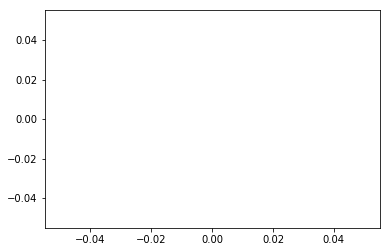

In [202]:
sorted_changes_r = analyse_cities(city_changes_r)

In [ ]:
sorted_changes_r[-20:]

In [ ]:
sorted_changes_r[0:20]